In [1]:
# Standard libraries

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

# Pylians, to calculate power spectrum

import MAS_library as MASL
import Pk_library as PKL

# Brenda lib

from brenda_lib import cySim_lib as cysim
from brenda_lib import pySim_lib as pysim

In [2]:
h = 0.67
Ngrid = 128 
Npart = Ngrid**3
lbox = 400 #502.5/h #502.5/h #128/h

In [3]:
# Define the columns to be read
Columns = ['Particle_ID', 'Px', 'Py', 'Pz', 'PVx', 'PVy', 'PVz', 'Host', 'Halo_ID', 'HaloType', 'Hx', 'Hy', 'Hz', 'HVx', 'HVy', 'HVz']

# Load the data from the file
Halos = '/home/msoumad/Git/Aletheia-ML_HF/L200-N32/Data_Set/Training_Set/Ascii/0000.ascii'
Data = pd.read_csv(Halos, sep='\s+', low_memory=False, names=Columns, skiprows=1)

In [4]:
DF = pd.DataFrame(Data, columns=Columns)
#DF

In [5]:
mask_halo = DF['Hz'] <  lbox/Ngrid #10  # Adjust the condition as necessary
sslice_halo = DF[mask_halo]
#sslice_halo

In [6]:
mask_part = DF['Pz'] <  lbox/Ngrid #10  # Adjust the condition as necessary
sslice_part = DF[mask_part]
#sslice_part

In [7]:
# Filter the DataFrame where HaloType is not equal to 1, not NaN, and not -1
Sub_Halo_DF = DF[(DF['HaloType'] != 1) & (DF['HaloType'] != -1) & (DF['HaloType'].notna())]
#Sub_Halo_DF


In [8]:
mask_Sub_Halo = Sub_Halo_DF['Hz'] <  lbox/Ngrid #10  # Adjust the condition as necessary
sslice_Sub_Halo = Sub_Halo_DF[mask_Sub_Halo]
#sslice_Sub_Halo

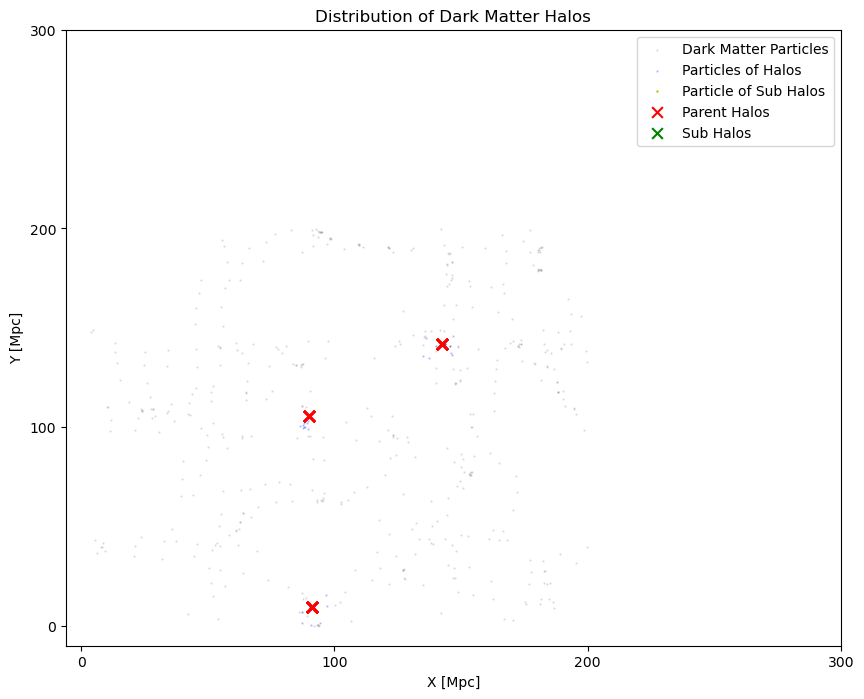

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(sslice_part["Px"], sslice_part["Py"], marker='.', c='grey', s=2, alpha=0.2, label='Dark Matter Particles' )
plt.scatter(sslice_halo['Px'], sslice_halo['Py'], c='b', marker='.', s=2, alpha=0.2, label='Particles of Halos')
plt.scatter(sslice_Sub_Halo["Px"], sslice_Sub_Halo["Py"], marker='.', c='y', s=2, alpha=1, label='Particle of Sub Halos' )
plt.scatter(sslice_halo['Hx']/0.67, sslice_halo['Hy']/0.67, c='r', marker='x', s=60, alpha=1, label='Parent Halos')
plt.scatter(sslice_Sub_Halo["Hx"]/0.67, sslice_Sub_Halo["Hy"]/0.67, marker='x', c='g', s=60, alpha=1, label='Sub Halos' )
plt.xticks(ticks=np.arange(0, lbox, 100)) #lbox/10))
plt.yticks(ticks=np.arange(0, lbox, 100)) #lbox/10))
plt.xlabel('X [Mpc]')
plt.ylabel('Y [Mpc]')

#plt.xlim(400,500)
#plt.ylim(150,250)

plt.title('Distribution of Dark Matter Halos')
plt.legend(loc='upper right')
plt.show()

#plt.savefig('Snap_L750_N256_rockstar_halos', format="pdf", bbox_inches='tight', dpi=300)

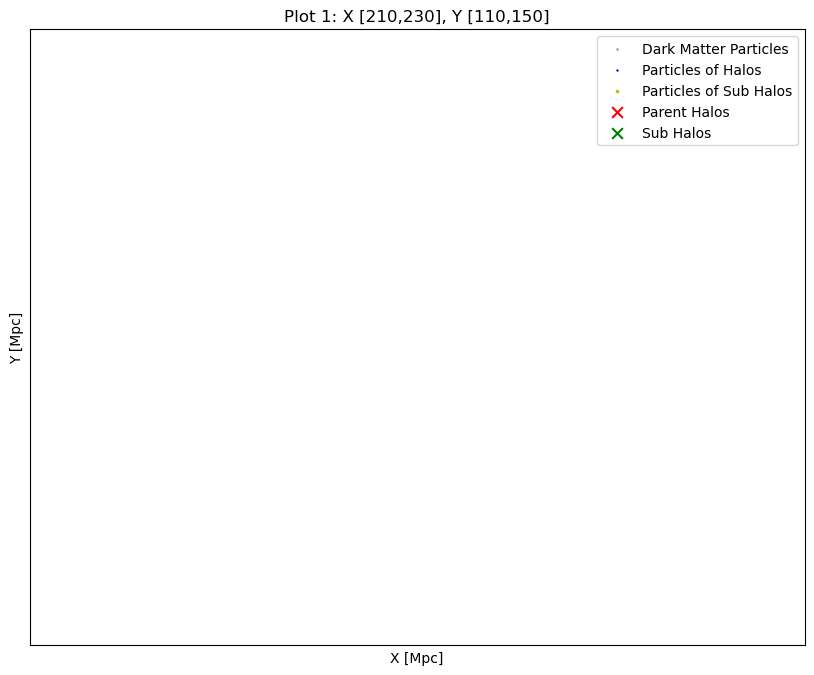

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(sslice_part["Px"], sslice_part["Py"], marker='.', c='grey', s=5, alpha=0.5, label='Dark Matter Particles' )
plt.scatter(sslice_halo['Px'], sslice_halo['Py'], c='b', marker='.', s=2, alpha=1, label='Particles of Halos')
plt.scatter(sslice_Sub_Halo["Px"], sslice_Sub_Halo["Py"], marker='.', c='y', s=10, alpha=1, label='Particles of Sub Halos' )
plt.scatter(sslice_halo['Hx']/0.67, sslice_halo['Hy']/0.67, c='r', marker='x', s=60, alpha=1, label='Parent Halos')
plt.scatter(sslice_Sub_Halo["Hx"]/0.67, sslice_Sub_Halo["Hy"]/0.67, marker='x', c='g', s=60, alpha=1, label='Sub Halos' )
plt.xticks(ticks=np.arange(0, lbox, 100)) #lbox/10))
plt.yticks(ticks=np.arange(0, lbox, 100)) #lbox/10))
plt.xlabel('X [Mpc]')
plt.ylabel('Y [Mpc]')

plt.xlim(145,165)
plt.ylim(250,270)

plt.title('Plot 1: X [210,230], Y [110,150]')
plt.legend(loc='upper right')
plt.show()

#plt.savefig('Snap_L750_N256_rockstar_halos', format="pdf", bbox_inches='tight', dpi=300)